<a href="https://colab.research.google.com/github/mistryamit03/End-to-End-Data-Analytics-Project---Tiller-by-Sumup/blob/main/Data_Cleaning_Tiller_by_Sumpup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import auth
auth.authenticate_user()

# We will work on the data one table at a time.
# Starting with table: "order_data"

In [ ]:
# your code here
import pandas as pd

#Make sure to update the project_id accordingly
project_id = "euphoric-graph-440415-s8"
dataset = "Tiller"
table = "order_data"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_order_data = pd.read_gbq(query, project_id=project_id)


In [ ]:
df_order_data.head(15)

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,112912195,6830,133612,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1
1,79969209,351,19300,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0
2,19702583,1513,15668,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8
3,95904308,6827,<NA>,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0
4,65244054,8291,<NA>,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9
5,4103400,2035,32141,2752,3063,2016-11-29 19:24:02+00:00,2016-11-29 19:24:14+00:00,CLOSED,None,0,2.4,2.4
6,21602791,2035,32070,2753,5949,2018-02-17 18:33:30+00:00,2018-02-17 19:41:50+00:00,CLOSED,Tiller iPAD,2,36.5,36.5
7,5706814,1513,15686,2464,424,2017-02-13 21:01:36+00:00,2017-02-13 21:18:35+00:00,CLOSED,None,2,61.4,61.4
8,6653607,351,<NA>,461,128,2017-03-21 10:38:44+00:00,2017-03-21 10:38:57+00:00,CLOSED,None,1,45.0,45.0
9,99699375,2035,28547,2752,5949,2019-10-24 16:42:30+00:00,2019-10-24 16:42:41+00:00,CLOSED,Tiller iPAD,0,4.4,4.4


In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id_order        1281148 non-null  Int64              
 1   id_store        1281148 non-null  Int64              
 2   id_table        200520 non-null   Int64              
 3   id_waiter       1191047 non-null  Int64              
 4   id_device       1272279 non-null  Int64              
 5   date_opened     1281148 non-null  datetime64[us, UTC]
 6   date_closed     1281148 non-null  datetime64[us, UTC]
 7   dim_status      1281148 non-null  object             
 8   dim_source      1224389 non-null  object             
 9   m_nb_customer   1281148 non-null  Int64              
 10  m_cached_payed  1281148 non-null  float64            
 11  m_cached_price  1281148 non-null  float64            
dtypes: Int64(6), datetime64[us, UTC](2), float64(2), object(

In [ ]:
df_order_data.shape

(1281148, 12)

# Finding the total sum of the NULL Values.

In [ ]:
df_order_data.isnull().sum()

,0
id_order,0
id_store,0
id_table,1080628
id_waiter,90101
id_device,8869
date_opened,0
date_closed,0
dim_status,0
dim_source,56759
m_nb_customer,0


# Based on the above sum of NULL values and the Timestamp data discovered. We will be dealing with following columns

1. id_table
2. date_opened/date_closed (convert and extract the time and date to new columns along with creating the another column for duration_minutes)
3. id_waiter
4. id_device
5. dim_source

# Checking the percentage of Null Values in the entire dataset.

In [ ]:
df_order_data.isnull().sum()/len(df_order_data) * 100

,0
id_order,0.000000
id_store,0.000000
id_table,84.348413
id_waiter,7.032833
id_device,0.692270
date_opened,0.000000
date_closed,0.000000
dim_status,0.000000
dim_source,4.430323
m_nb_customer,0.000000


<Axes: >

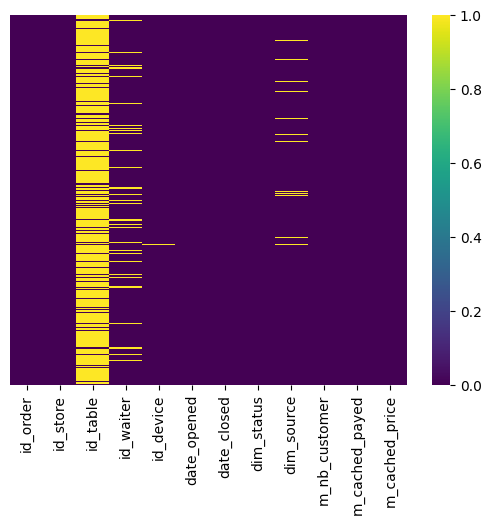

In [ ]:
sns.heatmap(df_order_data.isnull() , yticklabels= False , cbar= True , cmap="viridis")

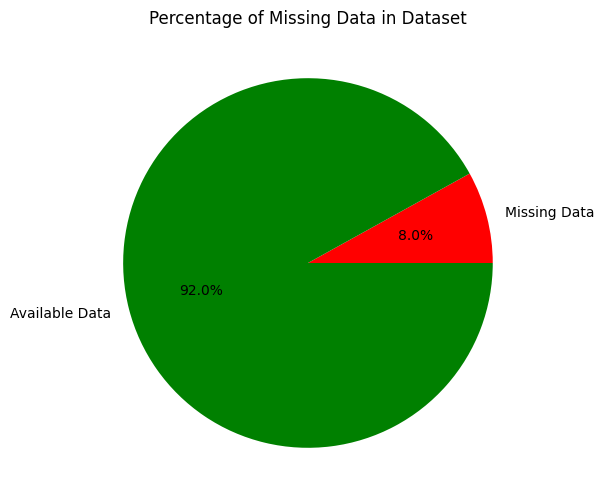

In [ ]:
missing_percentage = (df_order_data.isnull().sum().sum() / df_order_data.size) * 100

plt.figure(figsize=(6,6))
plt.pie([missing_percentage, 100 - missing_percentage],
        labels=['Missing Data', 'Available Data'],
        autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Percentage of Missing Data in Dataset")
plt.show()


# 1. Let deal with the first column :id_table

#  Since dim_table is more than 80% here we can drop the column as the column isn't critical for analysis or predictions.


In [ ]:
df_order_data.drop(columns="id_table", inplace = True)

In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281148 entries, 0 to 1281147
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   id_order        1281148 non-null  Int64              
 1   id_store        1281148 non-null  Int64              
 2   id_waiter       1191047 non-null  Int64              
 3   id_device       1272279 non-null  Int64              
 4   date_opened     1281148 non-null  datetime64[us, UTC]
 5   date_closed     1281148 non-null  datetime64[us, UTC]
 6   dim_status      1281148 non-null  object             
 7   dim_source      1224389 non-null  object             
 8   m_nb_customer   1281148 non-null  Int64              
 9   m_cached_payed  1281148 non-null  float64            
 10  m_cached_price  1281148 non-null  float64            
dtypes: Int64(5), datetime64[us, UTC](2), float64(2), object(2)
memory usage: 113.6+ MB


In [ ]:
df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9


<!-- # Now lets deal with waiter -->

# 2. Dealing with Timestamps now
Since the Date time field is already a timestamp, but the timestamps are in UTC so we will first convert them to Berlin (Europe timezone) and then do further preprocessing.

In [ ]:
df_order_data["date_opened_local"] = pd.to_datetime(df_order_data["date_opened"]).dt.tz_convert("Europe/Berlin").dt.tz_localize(None)
df_order_data["date_closed_local"] = pd.to_datetime(df_order_data["date_closed"]).dt.tz_convert("Europe/Berlin").dt.tz_localize(None)


df_order_data


,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.10,61.10,2020-01-14 23:06:18,2020-01-14 23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.00,128.00,2019-06-29 19:03:54,2019-06-29 20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.80,49.80,2018-01-20 20:21:43,2018-01-20 22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.00,54.00,2019-10-03 13:17:30,2019-10-03 13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.90,9.90,2019-03-26 13:45:35,2019-03-26 13:45:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281143,71596401,5281,<NA>,9411,2019-05-08 13:47:14+00:00,2019-05-08 15:41:26+00:00,CLOSED,Tiller iPAD,2,13.80,13.80,2019-05-08 15:47:14,2019-05-08 17:41:26
1281144,58238243,5281,<NA>,10484,2019-02-03 13:28:07+00:00,2019-02-03 13:52:05+00:00,CLOSED,Tiller iPAD,2,9.20,9.20,2019-02-03 14:28:07,2019-02-03 14:52:05
1281145,27092569,5281,9289,9411,2018-04-25 12:54:43+00:00,2018-04-25 12:55:27+00:00,CLOSED,Tiller iPAD,1,16.50,16.50,2018-04-25 14:54:43,2018-04-25 14:55:27
1281146,142124060,5281,9289,9411,2020-09-13 10:08:18+00:00,2020-09-13 10:08:39+00:00,CLOSED,tiller-order,1,15.50,15.50,2020-09-13 12:08:18,2020-09-13 12:08:39


# Lets further find out in minutes how much each table was occupied for each table

In [ ]:
df_order_data["duration_minutes"] = (df_order_data["date_closed_local"] - df_order_data["date_opened_local"]).dt.total_seconds()/60

df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667


# Here we will extract the date and time from the (date_opened_local	date_closed_local columns) into separate columns for date and time

In [ ]:
# Extracting the date and time separately just for the date_opened_local

df_order_data["opened_date_local"] = df_order_data["date_opened_local"].dt.date
df_order_data["opened_time_local"] = df_order_data["date_opened_local"].dt.time

df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35


In [ ]:
# Extracting the date and time separately just for the date_closed_local

df_order_data["closed_date_local"] = df_order_data["date_closed_local"].dt.date
df_order_data["closed_time_local"] = df_order_data["date_closed_local"].dt.time

df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39


# 2. id_waiter

In [ ]:
# Viewing only the NULL values in the particular NULL Value column.

df_order_data[df_order_data['id_waiter'].isnull()]

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
79,50639223,8291,<NA>,15747,2018-11-29 12:10:01+00:00,2018-11-29 16:18:34+00:00,CLOSED,Tiller iPAD,1,8.90,8.90,2018-11-29 13:10:01,2018-11-29 17:18:34,248.550000,2018-11-29,13:10:01,2018-11-29,17:18:34
130,97051495,7872,<NA>,15009,2019-10-09 17:37:27+00:00,2019-10-09 17:37:35+00:00,CLOSED,Tiller iPAD,1,45.00,45.00,2019-10-09 19:37:27,2019-10-09 19:37:35,0.133333,2019-10-09,19:37:27,2019-10-09,19:37:35
151,95632856,7872,<NA>,15009,2019-10-01 20:59:24+00:00,2019-10-01 21:00:02+00:00,CLOSED,Tiller iPAD,1,30.00,30.00,2019-10-01 22:59:24,2019-10-01 23:00:02,0.633333,2019-10-01,22:59:24,2019-10-01,23:00:02
172,50386223,8291,<NA>,15747,2018-11-27 11:28:03+00:00,2018-11-27 15:08:35+00:00,CLOSED,Tiller iPAD,1,20.80,20.80,2018-11-27 12:28:03,2018-11-27 16:08:35,220.533333,2018-11-27,12:28:03,2018-11-27,16:08:35
194,122554681,7872,<NA>,15009,2020-03-08 14:09:34+00:00,2020-03-08 14:10:32+00:00,CLOSED,Tiller iPAD,1,25.00,25.00,2020-03-08 15:09:34,2020-03-08 15:10:32,0.966667,2020-03-08,15:09:34,2020-03-08,15:10:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281139,83924720,5281,<NA>,9411,2019-07-22 15:33:03+00:00,2019-07-22 15:33:39+00:00,CLOSED,Tiller iPAD,1,7.25,7.25,2019-07-22 17:33:03,2019-07-22 17:33:39,0.600000,2019-07-22,17:33:03,2019-07-22,17:33:39
1281140,121305358,5281,<NA>,10484,2020-03-01 15:00:24+00:00,2020-03-01 17:16:18+00:00,CLOSED,Tiller iPAD,2,43.80,43.80,2020-03-01 16:00:24,2020-03-01 18:16:18,135.900000,2020-03-01,16:00:24,2020-03-01,18:16:18
1281143,71596401,5281,<NA>,9411,2019-05-08 13:47:14+00:00,2019-05-08 15:41:26+00:00,CLOSED,Tiller iPAD,2,13.80,13.80,2019-05-08 15:47:14,2019-05-08 17:41:26,114.200000,2019-05-08,15:47:14,2019-05-08,17:41:26
1281144,58238243,5281,<NA>,10484,2019-02-03 13:28:07+00:00,2019-02-03 13:52:05+00:00,CLOSED,Tiller iPAD,2,9.20,9.20,2019-02-03 14:28:07,2019-02-03 14:52:05,23.966667,2019-02-03,14:28:07,2019-02-03,14:52:05


# Calculating the number of unique values in the id_waiter column

In [ ]:
df_order_data['id_waiter'].nunique()

60

In [ ]:
df_order_data['id_waiter'].value_counts()

,count
id_waiter,
6607,765144
6643,70250
16823,44093
9289,42094
7405,36020
2464,22253
8257,17462
2752,17304
461,14615


# Again checking if the info for the sum of the id_waiter column for checking the sum of Null values.

In [ ]:
df_order_data.isnull().sum()

,0
id_order,0
id_store,0
id_waiter,90101
id_device,8869
date_opened,0
date_closed,0
dim_status,0
dim_source,56759
m_nb_customer,0
m_cached_payed,0


# Checking the percent of id_waiter column to check the percentage of null values compared to the total of the dataset value.

In [ ]:
df_order_data.isnull().sum()/len(df_order_data) * 100

,0
id_order,0.000000
id_store,0.000000
id_waiter,7.032833
id_device,0.692270
date_opened,0.000000
date_closed,0.000000
dim_status,0.000000
dim_source,4.430323
m_nb_customer,0.000000
m_cached_payed,0.000000


# We will replace the id_waiter with Mean. Suitable when missing data is small (not a large percentage) in this case it is only 7% compared to the total value of the dataset.

# If you're replacing NaN values in a column with the mean, you do not need to use [0] like you do with .mode(). That’s because:

# mean() returns a single scalar value (a float), not a Series.

# So, it can be used directly without indexing.

In [ ]:
df_order_data['id_waiter'].tail(5)

,id_waiter
1281143,<NA>
1281144,<NA>
1281145,9289
1281146,9289
1281147,<NA>


In [ ]:
df_order_data['id_waiter'].fillna(df_order_data['id_waiter'].mean(), inplace = True)

TypeError: Invalid value '7395.079607269906' for dtype Int64

# To fix the above error we need to either cast the entire waiter_id column into float or we can round the mean value to an int64 and then replace the mean to the null values.

In [ ]:
waiter_mean = round(df_order_data['id_waiter'].mean())

waiter_mean

7395

In [ ]:
df_order_data['id_waiter'].fillna(waiter_mean, inplace = True)

In [ ]:
df_order_data.head(15)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39
5,4103400,2035,2752,3063,2016-11-29 19:24:02+00:00,2016-11-29 19:24:14+00:00,CLOSED,None,0,2.4,2.4,2016-11-29 20:24:02,2016-11-29 20:24:14,0.200000,2016-11-29,20:24:02,2016-11-29,20:24:14
6,21602791,2035,2753,5949,2018-02-17 18:33:30+00:00,2018-02-17 19:41:50+00:00,CLOSED,Tiller iPAD,2,36.5,36.5,2018-02-17 19:33:30,2018-02-17 20:41:50,68.333333,2018-02-17,19:33:30,2018-02-17,20:41:50
7,5706814,1513,2464,424,2017-02-13 21:01:36+00:00,2017-02-13 21:18:35+00:00,CLOSED,None,2,61.4,61.4,2017-02-13 22:01:36,2017-02-13 22:18:35,16.983333,2017-02-13,22:01:36,2017-02-13,22:18:35
8,6653607,351,461,128,2017-03-21 10:38:44+00:00,2017-03-21 10:38:57+00:00,CLOSED,None,1,45.0,45.0,2017-03-21 11:38:44,2017-03-21 11:38:57,0.216667,2017-03-21,11:38:44,2017-03-21,11:38:57
9,99699375,2035,2752,5949,2019-10-24 16:42:30+00:00,2019-10-24 16:42:41+00:00,CLOSED,Tiller iPAD,0,4.4,4.4,2019-10-24 18:42:30,2019-10-24 18:42:41,0.183333,2019-10-24,18:42:30,2019-10-24,18:42:41


# Check to be sure if the id_waiter column has no more null values

In [ ]:
df_order_data.isnull().sum()

,0
id_order,0
id_store,0
id_waiter,0
id_device,8869
date_opened,0
date_closed,0
dim_status,0
dim_source,56759
m_nb_customer,0
m_cached_payed,0


# 3 ID_DEVICE

In [ ]:
df_order_data['id_device'].nunique()

44

In [ ]:
df_order_data['id_device'].value_counts()

,count
id_device,
12567,285690
12568,255869
12566,134779
14445,108146
10484,67965
9411,59799
15747,31710
10852,27260
10888,23238


In [ ]:
device_drop_index = df_order_data[df_order_data['id_device'].isnull()].index

device_drop_index

Index([     22,      99,     149,     173,     175,     258,     259,     264,
           283,     299,
       ...
       1273699, 1275506, 1276413, 1276443, 1276460, 1276478, 1276505, 1276616,
       1276636, 1276654],
      dtype='int64', length=8869)

In [ ]:
df_order_data.drop(index = device_drop_index, inplace = True)

In [ ]:
df_order_data.isnull().sum()

,0
id_order,0
id_store,0
id_waiter,0
id_device,0
date_opened,0
date_closed,0
dim_status,0
dim_source,51093
m_nb_customer,0
m_cached_payed,0


In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272279 entries, 0 to 1281147
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   id_order           1272279 non-null  Int64              
 1   id_store           1272279 non-null  Int64              
 2   id_waiter          1272279 non-null  Int64              
 3   id_device          1272279 non-null  Int64              
 4   date_opened        1272279 non-null  datetime64[us, UTC]
 5   date_closed        1272279 non-null  datetime64[us, UTC]
 6   dim_status         1272279 non-null  object             
 7   dim_source         1221186 non-null  object             
 8   m_nb_customer      1272279 non-null  Int64              
 9   m_cached_payed     1272279 non-null  float64            
 10  m_cached_price     1272279 non-null  float64            
 11  date_opened_local  1272279 non-null  datetime64[us]     
 12  date_closed_local  

In [ ]:
df_order_data['dim_source'].value_counts()

,count
dim_source,
Tiller iPAD,1122539
tiller-order,98647


In [ ]:
df_order_data['dim_source'].value_counts()/len('df_order_data') * 100

,count
dim_source,
Tiller iPAD,8.634915e+06
tiller-order,7.588231e+05


# Since the difference between Tiller iPAD and Tiller Order is very much, so we will fill the missing values with higher weightage of Tiller iPAD

In [ ]:
df_order_data['dim_source'].fillna('Tiller iPAD', axis = 0, inplace = True)

# Standardizing the entries of the data in dim_source column

In [ ]:
df_order_data['dim_source'].replace('tiller-order', 'Tiller order', inplace = True)

In [ ]:
df_order_data.isnull().sum()

,0
id_order,0
id_store,0
id_waiter,0
id_device,0
date_opened,0
date_closed,0
dim_status,0
dim_source,0
m_nb_customer,0
m_cached_payed,0


In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272279 entries, 0 to 1281147
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   id_order           1272279 non-null  Int64              
 1   id_store           1272279 non-null  Int64              
 2   id_waiter          1272279 non-null  Int64              
 3   id_device          1272279 non-null  Int64              
 4   date_opened        1272279 non-null  datetime64[us, UTC]
 5   date_closed        1272279 non-null  datetime64[us, UTC]
 6   dim_status         1272279 non-null  object             
 7   dim_source         1272279 non-null  object             
 8   m_nb_customer      1272279 non-null  Int64              
 9   m_cached_payed     1272279 non-null  float64            
 10  m_cached_price     1272279 non-null  float64            
 11  date_opened_local  1272279 non-null  datetime64[us]     
 12  date_closed_local  

In [ ]:
df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39


# Here we can only convert the
1. opened_date_local: 2020-01-14
2. opened_time_local: 23:06:18
3. closed_date_local: 2020-01-14
4. closed_time_local: 23:08:10

In [ ]:
# Step 1: Convert to datetime dtype

df_order_data['opened_date_local'] = pd.to_datetime(df_order_data['opened_date_local'])
df_order_data['closed_date_local'] = pd.to_datetime(df_order_data['closed_date_local'])


In [ ]:
df_order_data['opened_time_local'] = pd.to_datetime(df_order_data['opened_time_local'], format = '%H:%M:%S').dt.time
df_order_data['closed_time_local'] = pd.to_datetime(df_order_data['closed_time_local'], format = '%H:%M:%S').dt.time

In [ ]:
df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39


In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272279 entries, 0 to 1281147
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   id_order           1272279 non-null  Int64              
 1   id_store           1272279 non-null  Int64              
 2   id_waiter          1272279 non-null  Int64              
 3   id_device          1272279 non-null  Int64              
 4   date_opened        1272279 non-null  datetime64[us, UTC]
 5   date_closed        1272279 non-null  datetime64[us, UTC]
 6   dim_status         1272279 non-null  object             
 7   dim_source         1272279 non-null  object             
 8   m_nb_customer      1272279 non-null  Int64              
 9   m_cached_payed     1272279 non-null  float64            
 10  m_cached_price     1272279 non-null  float64            
 11  date_opened_local  1272279 non-null  datetime64[us]     
 12  date_closed_local  

In [ ]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272279 entries, 0 to 1281147
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   id_order           1272279 non-null  Int64              
 1   id_store           1272279 non-null  Int64              
 2   id_waiter          1272279 non-null  Int64              
 3   id_device          1272279 non-null  Int64              
 4   date_opened        1272279 non-null  datetime64[us, UTC]
 5   date_closed        1272279 non-null  datetime64[us, UTC]
 6   dim_status         1272279 non-null  object             
 7   dim_source         1272279 non-null  object             
 8   m_nb_customer      1272279 non-null  Int64              
 9   m_cached_payed     1272279 non-null  float64            
 10  m_cached_price     1272279 non-null  float64            
 11  date_opened_local  1272279 non-null  datetime64[us]     
 12  date_closed_local  

In [ ]:
df_order_data.head(5)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39


# Here we define the breakfast, lunch and dinner timings.If the timings fall in the below categories

# If they fall in midnight 12pm to noon 11.59am then - Breakfast
# If they fall from 12 noon to 17.59 - Lunch
# If they fall from 18.00 to 23.59 - Dinner

In [ ]:
breakfast_start = datetime.strptime('00:00:00', '%H:%M:%S').time()
breakfast_end = datetime.strptime('11:59:59', '%H:%M:%S').time()

lunch_start = datetime.strptime('12:00:00', '%H:%M:%S').time()
lunch_end = datetime.strptime('17:59:59', '%H:%M:%S').time()

dinner_start = datetime.strptime('18:00:00', '%H:%M:%S').time()
dinner_end = datetime.strptime('23:59:59', '%H:%M:%S').time()

In [ ]:
def meal(opened_time_local):
  if opened_time_local < breakfast_end:
    return 'Breakfast'
  elif opened_time_local < lunch_end:
    return 'Lunch'
  else:
    return 'Dinner'

In [ ]:
df_order_data['meal_types'] = df_order_data['opened_time_local'].apply(meal)

In [ ]:
df_order_data.head(15)

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price,date_opened_local,date_closed_local,duration_minutes,opened_date_local,opened_time_local,closed_date_local,closed_time_local,meal_types
0,112912195,6830,12894,13026,2020-01-14 22:06:18+00:00,2020-01-14 22:08:10+00:00,CLOSED,Tiller iPAD,4,61.1,61.1,2020-01-14 23:06:18,2020-01-14 23:08:10,1.866667,2020-01-14,23:06:18,2020-01-14,23:08:10,Dinner
1,79969209,351,461,128,2019-06-29 17:03:54+00:00,2019-06-29 18:22:21+00:00,CLOSED,Tiller iPAD,4,128.0,128.0,2019-06-29 19:03:54,2019-06-29 20:22:21,78.450000,2019-06-29,19:03:54,2019-06-29,20:22:21,Dinner
2,19702583,1513,2464,424,2018-01-20 19:21:43+00:00,2018-01-20 21:13:48+00:00,CLOSED,Tiller iPAD,2,49.8,49.8,2018-01-20 20:21:43,2018-01-20 22:13:48,112.083333,2018-01-20,20:21:43,2018-01-20,22:13:48,Dinner
3,95904308,6827,14302,13022,2019-10-03 11:17:30+00:00,2019-10-03 11:20:04+00:00,CLOSED,Tiller iPAD,1,54.0,54.0,2019-10-03 13:17:30,2019-10-03 13:20:04,2.566667,2019-10-03,13:17:30,2019-10-03,13:20:04,Lunch
4,65244054,8291,16823,15747,2019-03-26 12:45:35+00:00,2019-03-26 12:45:39+00:00,CLOSED,Tiller iPAD,1,9.9,9.9,2019-03-26 13:45:35,2019-03-26 13:45:39,0.066667,2019-03-26,13:45:35,2019-03-26,13:45:39,Lunch
5,4103400,2035,2752,3063,2016-11-29 19:24:02+00:00,2016-11-29 19:24:14+00:00,CLOSED,Tiller iPAD,0,2.4,2.4,2016-11-29 20:24:02,2016-11-29 20:24:14,0.200000,2016-11-29,20:24:02,2016-11-29,20:24:14,Dinner
6,21602791,2035,2753,5949,2018-02-17 18:33:30+00:00,2018-02-17 19:41:50+00:00,CLOSED,Tiller iPAD,2,36.5,36.5,2018-02-17 19:33:30,2018-02-17 20:41:50,68.333333,2018-02-17,19:33:30,2018-02-17,20:41:50,Dinner
7,5706814,1513,2464,424,2017-02-13 21:01:36+00:00,2017-02-13 21:18:35+00:00,CLOSED,Tiller iPAD,2,61.4,61.4,2017-02-13 22:01:36,2017-02-13 22:18:35,16.983333,2017-02-13,22:01:36,2017-02-13,22:18:35,Dinner
8,6653607,351,461,128,2017-03-21 10:38:44+00:00,2017-03-21 10:38:57+00:00,CLOSED,Tiller iPAD,1,45.0,45.0,2017-03-21 11:38:44,2017-03-21 11:38:57,0.216667,2017-03-21,11:38:44,2017-03-21,11:38:57,Breakfast
9,99699375,2035,2752,5949,2019-10-24 16:42:30+00:00,2019-10-24 16:42:41+00:00,CLOSED,Tiller iPAD,0,4.4,4.4,2019-10-24 18:42:30,2019-10-24 18:42:41,0.183333,2019-10-24,18:42:30,2019-10-24,18:42:41,Dinner


In [ ]:
!pip install pandas-gbq --quiet

In [ ]:
from pandas_gbq import to_gbq

# Set variables
project_id = 'euphoric-graph-440415-s8'
dataset_table = 'Tiller.order_data_cleaned'  # Format: dataset.table_name

# Export the cleaned DataFrame
to_gbq(df_order_data,
       destination_table=dataset_table,
       project_id=project_id,
       if_exists='fail')  # Fails if table already exists


100%|██████████| 1/1 [00:00<00:00, 3569.62it/s]


In [ ]:
# Define your SQL query
query = """
SELECT * FROM `your_project.your_dataset.your_table`
LIMIT 1000
"""

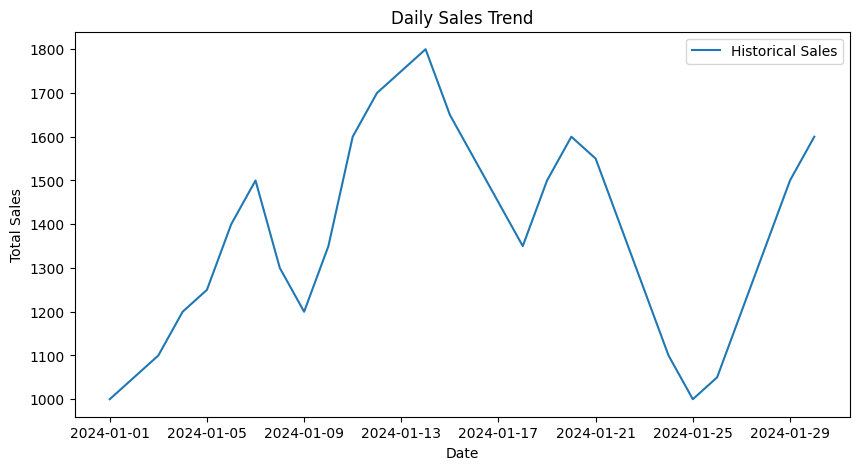

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample Sales Data
data = {
    "date": pd.date_range(start="2024-01-01", periods=30, freq="D"),
    "total_sales": [1000, 1050, 1100, 1200, 1250, 1400, 1500, 1300, 1200, 1350,
                    1600, 1700, 1750, 1800, 1650, 1550, 1450, 1350, 1500, 1600,
                    1550, 1400, 1250, 1100, 1000, 1050, 1200, 1350, 1500, 1600]
}

df = pd.DataFrame(data)
df.set_index("date", inplace=True)

# Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(df, label="Historical Sales")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


In [ ]:
# Train ARIMA Model
model = ARIMA(df['total_sales'], order=(5,1,0))  # (p,d,q) = (5,1,0)
model_fit = model.fit()

# Forecast next 7 days
forecast = model_fit.forecast(steps=7)
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7)

# Display Forecasted Sales
forecast_df = pd.DataFrame({"date": forecast_dates, "predicted_sales": forecast})
print(forecast_df)


                 date  predicted_sales
2024-01-31 2024-01-31      1581.598276
2024-02-01 2024-02-01      1503.325330
2024-02-02 2024-02-02      1434.409142
2024-02-03 2024-02-03      1391.450866
2024-02-04 2024-02-04      1386.288790
2024-02-05 2024-02-05      1415.169298
2024-02-06 2024-02-06      1450.058894


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Sample Orders Data
transactions = [
    ["Pizza", "Soda"],
    ["Burger", "Fries", "Soda"],
    ["Pizza", "Fries"],
    ["Burger", "Fries"],
    ["Pizza", "Burger", "Soda"],
    ["Pizza", "Fries", "Soda"],
    ["Burger", "Fries", "Ice Cream"],
    ["Pizza", "Ice Cream"],
    ["Burger", "Fries", "Soda"],
    ["Pizza", "Burger", "Fries"]
]

# Convert Transactions to DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_orders = pd.DataFrame(te_ary, columns=te.columns_)

print(df_orders.head())  # Display encoded transactions


   Burger  Fries  Ice Cream  Pizza   Soda
0   False  False      False   True   True
1    True   True      False  False   True
2   False   True      False   True  False
3    True   True      False  False  False
4    True  False      False   True   True


In [ ]:
# Generate Frequent Itemsets
frequent_itemsets = apriori(df_orders, min_support=0.3, use_colnames=True)

# Extract Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display top meal combos
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [ ]:
# your code here
import pandas as pd

#Make sure to update the project_id accordingly
project_id = "euphoric-graph-440415-s8"
dataset = "Tiller"
table = "order_line"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_order_line = pd.read_gbq(query, project_id=project_id)

In [55]:
df_order_line.head(5)

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_feature_type,dim_unit_measure,dim_unit_measure_display,dim_category_translated,dim_name_translated
0,166882659,37168827,2018-08-01 10:47:54+00:00,2018-08-01 10:49:20+00:00,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,WRAP DE SARRASIN,NYC,IN_PROGRESS,None,None,None,BUCKWHEAT WRAP,NYC
1,110372702,22931631,2018-03-08 18:42:10+00:00,2018-03-08 18:42:10+00:00,1.0,0.0,0.0,0.0,0.0,0.1,0.0,OPTION,Cuissons,Bleu,IN_PROGRESS,None,None,None,cooking,Blue
2,183014997,40933130,2018-09-08 10:45:53+00:00,2018-09-08 10:49:09+00:00,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,None,None,None,BRUNCH,Egg
3,162063210,36015113,2018-07-21 10:43:45+00:00,2018-07-21 10:44:05+00:00,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,None,None,None,BRUNCH,Egg
4,225434474,51781767,2018-12-08 12:01:11+00:00,2018-12-08 12:04:16+00:00,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,None,None,None,BRUNCH,Egg


In [56]:
df_order_line.shape

(3924748, 20)

In [57]:
df_order_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924748 entries, 0 to 3924747
Data columns (total 20 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   id_order_line             Int64              
 1   id_order                  Int64              
 2   date_opended              datetime64[us, UTC]
 3   date_created              datetime64[us, UTC]
 4   m_quantity                float64            
 5   m_unit_price              float64            
 6   m_unit_price_exc_vat      float64            
 7   m_total_price_inc_vat     float64            
 8   m_total_price_exc_vat     float64            
 9   m_tax_percent             float64            
 10  m_discount_amount         float64            
 11  dim_type                  object             
 12  dim_category              object             
 13  dim_name                  object             
 14  dim_status                object             
 15  dim_feature_typ

In [58]:
df_order_line.isnull().sum()

,0
id_order_line,0
id_order,0
date_opended,0
date_created,0
m_quantity,0
m_unit_price,0
m_unit_price_exc_vat,0
m_total_price_inc_vat,0
m_total_price_exc_vat,0
m_tax_percent,0


In [59]:
df_order_line.isnull().sum() / len(df_order_line) * 100

,0
id_order_line,0.000000
id_order,0.000000
date_opended,0.000000
date_created,0.000000
m_quantity,0.000000
m_unit_price,0.000000
m_unit_price_exc_vat,0.000000
m_total_price_inc_vat,0.000000
m_total_price_exc_vat,0.000000
m_tax_percent,0.000000


# Changing the datatype of id_order_line and id_order into str

IDs are not numbers you do math with – you don’t add or average them. So treating them as strings avoids accidental numerical operations.

String format preserves leading zeros, which are often lost when stored as integers (e.g., ID 00123 becomes 123).

Makes it easier to join/merge with other tables where the same column might be a string.

In [60]:
df_order_line[['id_order_line','id_order']] = df_order_line[['id_order_line','id_order']].astype(str)

# Change the date opended and date closed to change the format
# and
# Change the timezone to Berlin local timezone

In [61]:
df_order_line['date_opended'] = pd.to_datetime(df_order_line['date_opended'],format = "%d/%m/%Y %H:%M:%S")
df_order_line['date_created'] = pd.to_datetime(df_order_line['date_created'],format = "%d/%m/%Y %H:%M:%S")

In [65]:
# Changing to local time

df_order_line['date_opended'] = pd.to_datetime(df_order_line['date_opended']).dt.tz_convert("Europe/Berlin").dt.tz_localize(None)
df_order_line['date_created'] = pd.to_datetime(df_order_line['date_created']).dt.tz_convert("Europe/Berlin").dt.tz_localize(None)

In [66]:
df_order_line.head(3)

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_feature_type,dim_unit_measure,dim_unit_measure_display,dim_category_translated,dim_name_translated
0,166882659,37168827,2018-08-01 12:47:54,2018-08-01 12:49:20,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,WRAP DE SARRASIN,NYC,IN_PROGRESS,None,None,None,BUCKWHEAT WRAP,NYC
1,110372702,22931631,2018-03-08 19:42:10,2018-03-08 19:42:10,1.0,0.0,0.0,0.0,0.0,0.1,0.0,OPTION,Cuissons,Bleu,IN_PROGRESS,None,None,None,cooking,Blue
2,183014997,40933130,2018-09-08 12:45:53,2018-09-08 12:49:09,1.0,0.0,0.0,0.0,0.0,0.1,0.0,PRODUCT,BRUNCH,Oeuf,IN_PROGRESS,None,None,None,BRUNCH,Egg


In [67]:
df_order_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924748 entries, 0 to 3924747
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id_order_line             object        
 1   id_order                  object        
 2   date_opended              datetime64[us]
 3   date_created              datetime64[us]
 4   m_quantity                float64       
 5   m_unit_price              float64       
 6   m_unit_price_exc_vat      float64       
 7   m_total_price_inc_vat     float64       
 8   m_total_price_exc_vat     float64       
 9   m_tax_percent             float64       
 10  m_discount_amount         float64       
 11  dim_type                  object        
 12  dim_category              object        
 13  dim_name                  object        
 14  dim_status                object        
 15  dim_feature_type          object        
 16  dim_unit_measure          object        
 17  dim_unit

# dim_feature_type, dim_unit_measure, dim_unit_measure_display : These columns have almost 90 and more than 90 percent missing values Hence we will drop the column.

In [68]:
df_order_line.drop(columns = ['dim_feature_type', 'dim_unit_measure', 'dim_unit_measure_display'], inplace = True)

In [69]:
df_order_line.isnull().sum()

,0
id_order_line,0
id_order,0
date_opended,0
date_created,0
m_quantity,0
m_unit_price,0
m_unit_price_exc_vat,0
m_total_price_inc_vat,0
m_total_price_exc_vat,0
m_tax_percent,0


In [73]:
df_order_line['dim_category'].value_counts()

,count
dim_category,
CONSIGNE,1278896
PRESSION,513254
SOFT,236536
EXPRESSIONS ESPRESSO,124811
VINS & CHAMPAGNES,91470
...,...
Café toref,1
AUTRES SPƒCIALITƒS CHAUDES,1
Retour / Avoir,1


In [74]:
df_order_line['dim_category'].unique()

array(['WRAP DE SARRASIN', 'Cuissons', 'BRUNCH', 'CAFE / THE', 'Boissons',
       'Boissons chaudes', 'Brunch', 'Martini 15 cl',
       'FOCACCIA A EMPORTER', 'BOISSONS FRAICHES', 'Champagne',
       "BREIZH'N'ROLL", 'Eaux', 'Formule dejeuner', 'PIZZA', 'Martini',
       'SIDES', 'OPTIONS', 'SOUPE ET RAMEN', 'Long Drink', 'DESSERTS',
       'PASTA SUR PLACE', 'PARFUM', 'Parfums Glaces', 'Accompagnements',
       'Jus de fruits', 'Sorbets / Glace', 'panna cotta', 'Cuisson',
       'Desserts A E', 'SNACKS SUCRES', 'ENTREES', 'PRESSION',
       'ANTIPASTI', 'Royal biryani', 'Vins Rouges A.O.P', 'Entrees',
       'DESSERTS SUR PLACE', 'Vin rouges', 'Réveillon',
       'PLATS DU JOUR VITRINE', 'MENU', 'PLATS', 'Choix vegetarien nord',
       'Menu 25,00', 'BOWLS DE SAISON', 'SALADES', 'BOISSONS',
       'Menu 16,50', 'PASTA A EMPORTER', 'Desserts', 'Vin blancs',
       'Choix vegetarien sud', 'BOWL', 'AVOCADO TOAST',
       'Choix vegetarien sud 1', 'PLATS CHAUDS', 'WEEKLY BOWL', 'Plats',
 

#What to Do: Clean it before analyzing Run this before doing .value_counts() or .unique() order_line['dim_category'] = order_line['dim_category'].str.strip().str.lower() and print(order_line['dim_category'].value_counts()) and print(order_line['dim_category'].nunique())  
# number of unique values

